In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('datasets/marks.txt',delimiter = ',')

In [3]:
### Creating features and labels for train and test set
### 10% of total data used as test data
x_train1 = data[:90,:2]
y_train1 = data[:90,2]
x_test1 = data[90:,:2]
y_test1 = data[90:,2]
y_train1 = np.reshape(y_train1,[y_train1.shape[0],1])
y_test1 = np.reshape(y_test1,[y_test1.shape[0],1])
print(x_train1.shape,y_train1.shape, x_test1.shape,y_test1.shape)

(90, 2) (90, 1) (10, 2) (10, 1)


In [4]:
# Normalization of train set
# print(x_train1)
x_train = np.empty(x_train1.shape)
m = []
v = []
for i in range(0,x_train1.shape[1]):
    mean = np.mean(x_train1[:,i])
    var = np.var(x_train1[:,i])
    m.append(mean)
    v.append(var)
    x_train[:,i] = x_train1[:,i] - mean*np.ones(x_train1[:,i].shape)
    x_train[:,i] = x_train[:,i]/var
y_train = y_train1
y_test = y_test1

In [5]:
## Sigmoid function
def sigmoid(x):
    res = np.empty(x.shape)
    for i in range(0,x.shape[0]):
        for j in range(0,x.shape[1]):
            if(x[i,j]<-700):           #### Used to overcome overflow error
                res[i,j] = 0.0
            else:
                res[i,j] = 1.0/(1+np.exp(-x[i,j]))
    return res

In [6]:
# Training
epochs = 5000   ## Number of epochs
w = np.ones([x_train.shape[1],1])
batch_size = 90    ## Batch size
batch = int(x_train.shape[0]/batch_size)
lr = 0.1     ### Learning rate
loss = []
for i in range(0,epochs):
    for b in range(0,batch):
        y_pred = sigmoid(x_train[b:b+batch_size]@w)
        y_pred_t = np.reshape(y_pred,y_pred.shape[0])
        R = np.diag(y_pred_t*(1-y_pred_t))
        
        # Uncoment the next line and comment the line following that to use learning rate instead of Hermetion matrix

#         w = w - lr*x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_train.shape[0]        
        w = w - np.linalg.inv(x_train[b:b+batch_size].T@R@x_train[b:b+batch_size])@x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_train.shape[0]
    y_pred = sigmoid(x_train@w)
    l1 = -np.sum(y_train*np.log(y_pred) + (1-y_train)*np.log(1-y_pred))/y_pred.shape[0]
    print("Epoch",i,"Loss",l1)
    loss.append(l1)

Epoch 0 Loss 0.6591159799050136
Epoch 1 Loss 0.6531640789070782
Epoch 2 Loss 0.6473329398276368
Epoch 3 Loss 0.6416184959463016
Epoch 4 Loss 0.6360168776854008
Epoch 5 Loss 0.6305244006073537
Epoch 6 Loss 0.6251375542854608
Epoch 7 Loss 0.61985299197419
Epoch 8 Loss 0.6146675210121604
Epoch 9 Loss 0.6095780938973685
Epoch 10 Loss 0.6045817999798778
Epoch 11 Loss 0.5996758577222737
Epoch 12 Loss 0.5948576074827338
Epoch 13 Loss 0.5901245047796532
Epoch 14 Loss 0.5854741140004324
Epoch 15 Loss 0.5809041025203439
Epoch 16 Loss 0.5764122352003701
Epoch 17 Loss 0.5719963692355915
Epoch 18 Loss 0.5676544493281325
Epoch 19 Loss 0.5633845031608684
Epoch 20 Loss 0.5591846371500819
Epoch 21 Loss 0.5550530324570642
Epoch 22 Loss 0.5509879412402863
Epoch 23 Loss 0.5469876831312573
Epoch 24 Loss 0.5430506419185327
Epoch 25 Loss 0.53917526242557
Epoch 26 Loss 0.5353600475692479
Epoch 27 Loss 0.5316035555868908
Epoch 28 Loss 0.527904397420568
Epoch 29 Loss 0.5242612342483026
Epoch 30 Loss 0.520672775

Epoch 428 Loss 0.24752913650125916
Epoch 429 Loss 0.24752139996882608
Epoch 430 Loss 0.24751382175023776
Epoch 431 Loss 0.24750639872800043
Epoch 432 Loss 0.24749912784238587
Epoch 433 Loss 0.24749200609046645
Epoch 434 Loss 0.24748503052516252
Epoch 435 Loss 0.24747819825430356
Epoch 436 Loss 0.2474715064397019
Epoch 437 Loss 0.24746495229623938
Epoch 438 Loss 0.24745853309096705
Epoch 439 Loss 0.24745224614221692
Epoch 440 Loss 0.2474460888187269
Epoch 441 Loss 0.24744005853877812
Epoch 442 Loss 0.24743415276934397
Epoch 443 Loss 0.24742836902525223
Epoch 444 Loss 0.2474227048683587
Epoch 445 Loss 0.24741715790673327
Epoch 446 Loss 0.24741172579385745
Epoch 447 Loss 0.24740640622783416
Epoch 448 Loss 0.24740119695060905
Epoch 449 Loss 0.24739609574720317
Epoch 450 Loss 0.2473911004449573
Epoch 451 Loss 0.24738620891278762
Epoch 452 Loss 0.2473814190604526
Epoch 453 Loss 0.24737672883783096
Epoch 454 Loss 0.24737213623421053
Epoch 455 Loss 0.24736763927758823
Epoch 456 Loss 0.24736323

Epoch 802 Loss 0.2471605502055527
Epoch 803 Loss 0.24716054808179727
Epoch 804 Loss 0.24716054600491433
Epoch 805 Loss 0.24716054397387005
Epoch 806 Loss 0.24716054198765325
Epoch 807 Loss 0.2471605400452752
Epoch 808 Loss 0.2471605381457689
Epoch 809 Loss 0.24716053628818868
Epoch 810 Loss 0.2471605344716097
Epoch 811 Loss 0.24716053269512742
Epoch 812 Loss 0.24716053095785742
Epoch 813 Loss 0.24716052925893459
Epoch 814 Loss 0.24716052759751297
Epoch 815 Loss 0.24716052597276525
Epoch 816 Loss 0.2471605243838824
Epoch 817 Loss 0.24716052283007306
Epoch 818 Loss 0.24716052131056354
Epoch 819 Loss 0.247160519824597
Epoch 820 Loss 0.24716051837143338
Epoch 821 Loss 0.24716051695034907
Epoch 822 Loss 0.24716051556063615
Epoch 823 Loss 0.24716051420160237
Epoch 824 Loss 0.2471605128725709
Epoch 825 Loss 0.2471605115728798
Epoch 826 Loss 0.24716051030188152
Epoch 827 Loss 0.24716050905894302
Epoch 828 Loss 0.24716050784344507
Epoch 829 Loss 0.2471605066547822
Epoch 830 Loss 0.2471605054923

Epoch 1117 Loss 0.24716045410479753
Epoch 1118 Loss 0.24716045410293058
Epoch 1119 Loss 0.2471604541011049
Epoch 1120 Loss 0.24716045409931964
Epoch 1121 Loss 0.24716045409757378
Epoch 1122 Loss 0.2471604540958665
Epoch 1123 Loss 0.24716045409419693
Epoch 1124 Loss 0.24716045409256426
Epoch 1125 Loss 0.24716045409096768
Epoch 1126 Loss 0.24716045408940637
Epoch 1127 Loss 0.2471604540878796
Epoch 1128 Loss 0.24716045408638657
Epoch 1129 Loss 0.24716045408492646
Epoch 1130 Loss 0.24716045408349865
Epoch 1131 Loss 0.24716045408210244
Epoch 1132 Loss 0.247160454080737
Epoch 1133 Loss 0.24716045407940182
Epoch 1134 Loss 0.24716045407809617
Epoch 1135 Loss 0.2471604540768192
Epoch 1136 Loss 0.24716045407557052
Epoch 1137 Loss 0.2471604540743495
Epoch 1138 Loss 0.2471604540731555
Epoch 1139 Loss 0.24716045407198778
Epoch 1140 Loss 0.2471604540708459
Epoch 1141 Loss 0.24716045406972928
Epoch 1142 Loss 0.2471604540686373
Epoch 1143 Loss 0.24716045406756942
Epoch 1144 Loss 0.2471604540665252
Epo

Epoch 1465 Loss 0.24716045402035058
Epoch 1466 Loss 0.2471604540203498
Epoch 1467 Loss 0.24716045402034906
Epoch 1468 Loss 0.24716045402034825
Epoch 1469 Loss 0.24716045402034756
Epoch 1470 Loss 0.24716045402034684
Epoch 1471 Loss 0.2471604540203461
Epoch 1472 Loss 0.24716045402034545
Epoch 1473 Loss 0.24716045402034476
Epoch 1474 Loss 0.24716045402034406
Epoch 1475 Loss 0.24716045402034348
Epoch 1476 Loss 0.24716045402034284
Epoch 1477 Loss 0.24716045402034226
Epoch 1478 Loss 0.24716045402034162
Epoch 1479 Loss 0.24716045402034104
Epoch 1480 Loss 0.24716045402034045
Epoch 1481 Loss 0.24716045402033993
Epoch 1482 Loss 0.24716045402033934
Epoch 1483 Loss 0.2471604540203388
Epoch 1484 Loss 0.24716045402033826
Epoch 1485 Loss 0.2471604540203378
Epoch 1486 Loss 0.24716045402033723
Epoch 1487 Loss 0.24716045402033682
Epoch 1488 Loss 0.2471604540203363
Epoch 1489 Loss 0.24716045402033582
Epoch 1490 Loss 0.24716045402033535
Epoch 1491 Loss 0.24716045402033499
Epoch 1492 Loss 0.247160454020334

Epoch 1865 Loss 0.24716045402031517
Epoch 1866 Loss 0.24716045402031517
Epoch 1867 Loss 0.24716045402031514
Epoch 1868 Loss 0.24716045402031514
Epoch 1869 Loss 0.2471604540203151
Epoch 1870 Loss 0.24716045402031514
Epoch 1871 Loss 0.24716045402031517
Epoch 1872 Loss 0.24716045402031514
Epoch 1873 Loss 0.24716045402031514
Epoch 1874 Loss 0.2471604540203151
Epoch 1875 Loss 0.24716045402031514
Epoch 1876 Loss 0.2471604540203151
Epoch 1877 Loss 0.24716045402031514
Epoch 1878 Loss 0.2471604540203151
Epoch 1879 Loss 0.24716045402031517
Epoch 1880 Loss 0.24716045402031517
Epoch 1881 Loss 0.24716045402031514
Epoch 1882 Loss 0.24716045402031514
Epoch 1883 Loss 0.2471604540203151
Epoch 1884 Loss 0.24716045402031514
Epoch 1885 Loss 0.24716045402031514
Epoch 1886 Loss 0.24716045402031506
Epoch 1887 Loss 0.24716045402031517
Epoch 1888 Loss 0.24716045402031517
Epoch 1889 Loss 0.24716045402031517
Epoch 1890 Loss 0.24716045402031514
Epoch 1891 Loss 0.2471604540203151
Epoch 1892 Loss 0.2471604540203151

Epoch 2179 Loss 0.24716045402031514
Epoch 2180 Loss 0.2471604540203151
Epoch 2181 Loss 0.24716045402031514
Epoch 2182 Loss 0.24716045402031517
Epoch 2183 Loss 0.24716045402031517
Epoch 2184 Loss 0.24716045402031514
Epoch 2185 Loss 0.24716045402031514
Epoch 2186 Loss 0.24716045402031514
Epoch 2187 Loss 0.24716045402031514
Epoch 2188 Loss 0.24716045402031514
Epoch 2189 Loss 0.24716045402031506
Epoch 2190 Loss 0.24716045402031514
Epoch 2191 Loss 0.24716045402031514
Epoch 2192 Loss 0.24716045402031514
Epoch 2193 Loss 0.24716045402031517
Epoch 2194 Loss 0.2471604540203151
Epoch 2195 Loss 0.24716045402031517
Epoch 2196 Loss 0.24716045402031514
Epoch 2197 Loss 0.2471604540203151
Epoch 2198 Loss 0.24716045402031514
Epoch 2199 Loss 0.2471604540203151
Epoch 2200 Loss 0.24716045402031514
Epoch 2201 Loss 0.2471604540203151
Epoch 2202 Loss 0.24716045402031517
Epoch 2203 Loss 0.2471604540203151
Epoch 2204 Loss 0.24716045402031514
Epoch 2205 Loss 0.24716045402031514
Epoch 2206 Loss 0.2471604540203151

Epoch 2523 Loss 0.24716045402031514
Epoch 2524 Loss 0.24716045402031514
Epoch 2525 Loss 0.24716045402031517
Epoch 2526 Loss 0.24716045402031514
Epoch 2527 Loss 0.24716045402031517
Epoch 2528 Loss 0.24716045402031514
Epoch 2529 Loss 0.24716045402031514
Epoch 2530 Loss 0.2471604540203151
Epoch 2531 Loss 0.2471604540203151
Epoch 2532 Loss 0.2471604540203151
Epoch 2533 Loss 0.2471604540203151
Epoch 2534 Loss 0.24716045402031514
Epoch 2535 Loss 0.24716045402031514
Epoch 2536 Loss 0.24716045402031514
Epoch 2537 Loss 0.2471604540203151
Epoch 2538 Loss 0.24716045402031517
Epoch 2539 Loss 0.2471604540203151
Epoch 2540 Loss 0.2471604540203151
Epoch 2541 Loss 0.24716045402031517
Epoch 2542 Loss 0.24716045402031514
Epoch 2543 Loss 0.24716045402031514
Epoch 2544 Loss 0.24716045402031514
Epoch 2545 Loss 0.2471604540203151
Epoch 2546 Loss 0.24716045402031514
Epoch 2547 Loss 0.24716045402031517
Epoch 2548 Loss 0.2471604540203151
Epoch 2549 Loss 0.24716045402031514
Epoch 2550 Loss 0.24716045402031514
E

Epoch 2856 Loss 0.24716045402031514
Epoch 2857 Loss 0.24716045402031514
Epoch 2858 Loss 0.24716045402031514
Epoch 2859 Loss 0.24716045402031514
Epoch 2860 Loss 0.24716045402031514
Epoch 2861 Loss 0.24716045402031514
Epoch 2862 Loss 0.2471604540203151
Epoch 2863 Loss 0.2471604540203151
Epoch 2864 Loss 0.2471604540203151
Epoch 2865 Loss 0.2471604540203151
Epoch 2866 Loss 0.24716045402031517
Epoch 2867 Loss 0.2471604540203151
Epoch 2868 Loss 0.2471604540203151
Epoch 2869 Loss 0.24716045402031514
Epoch 2870 Loss 0.24716045402031514
Epoch 2871 Loss 0.24716045402031517
Epoch 2872 Loss 0.24716045402031514
Epoch 2873 Loss 0.24716045402031517
Epoch 2874 Loss 0.24716045402031517
Epoch 2875 Loss 0.2471604540203151
Epoch 2876 Loss 0.24716045402031517
Epoch 2877 Loss 0.24716045402031514
Epoch 2878 Loss 0.24716045402031514
Epoch 2879 Loss 0.24716045402031517
Epoch 2880 Loss 0.24716045402031514
Epoch 2881 Loss 0.24716045402031514
Epoch 2882 Loss 0.24716045402031514
Epoch 2883 Loss 0.24716045402031517

Epoch 3302 Loss 0.24716045402031517
Epoch 3303 Loss 0.24716045402031517
Epoch 3304 Loss 0.24716045402031517
Epoch 3305 Loss 0.24716045402031517
Epoch 3306 Loss 0.24716045402031517
Epoch 3307 Loss 0.24716045402031517
Epoch 3308 Loss 0.24716045402031517
Epoch 3309 Loss 0.24716045402031517
Epoch 3310 Loss 0.24716045402031517
Epoch 3311 Loss 0.24716045402031517
Epoch 3312 Loss 0.24716045402031517
Epoch 3313 Loss 0.24716045402031517
Epoch 3314 Loss 0.24716045402031517
Epoch 3315 Loss 0.24716045402031517
Epoch 3316 Loss 0.24716045402031517
Epoch 3317 Loss 0.24716045402031517
Epoch 3318 Loss 0.24716045402031517
Epoch 3319 Loss 0.24716045402031517
Epoch 3320 Loss 0.24716045402031517
Epoch 3321 Loss 0.24716045402031517
Epoch 3322 Loss 0.24716045402031517
Epoch 3323 Loss 0.24716045402031517
Epoch 3324 Loss 0.24716045402031517
Epoch 3325 Loss 0.24716045402031517
Epoch 3326 Loss 0.24716045402031517
Epoch 3327 Loss 0.24716045402031517
Epoch 3328 Loss 0.24716045402031517
Epoch 3329 Loss 0.2471604540

Epoch 3692 Loss 0.24716045402031517
Epoch 3693 Loss 0.24716045402031517
Epoch 3694 Loss 0.24716045402031517
Epoch 3695 Loss 0.24716045402031517
Epoch 3696 Loss 0.24716045402031517
Epoch 3697 Loss 0.24716045402031517
Epoch 3698 Loss 0.24716045402031517
Epoch 3699 Loss 0.24716045402031517
Epoch 3700 Loss 0.24716045402031517
Epoch 3701 Loss 0.24716045402031517
Epoch 3702 Loss 0.24716045402031517
Epoch 3703 Loss 0.24716045402031517
Epoch 3704 Loss 0.24716045402031517
Epoch 3705 Loss 0.24716045402031517
Epoch 3706 Loss 0.24716045402031517
Epoch 3707 Loss 0.24716045402031517
Epoch 3708 Loss 0.24716045402031517
Epoch 3709 Loss 0.24716045402031517
Epoch 3710 Loss 0.24716045402031517
Epoch 3711 Loss 0.24716045402031517
Epoch 3712 Loss 0.24716045402031517
Epoch 3713 Loss 0.24716045402031517
Epoch 3714 Loss 0.24716045402031517
Epoch 3715 Loss 0.24716045402031517
Epoch 3716 Loss 0.24716045402031517
Epoch 3717 Loss 0.24716045402031517
Epoch 3718 Loss 0.24716045402031517
Epoch 3719 Loss 0.2471604540

Epoch 4058 Loss 0.24716045402031517
Epoch 4059 Loss 0.24716045402031517
Epoch 4060 Loss 0.24716045402031517
Epoch 4061 Loss 0.24716045402031517
Epoch 4062 Loss 0.24716045402031517
Epoch 4063 Loss 0.24716045402031517
Epoch 4064 Loss 0.24716045402031517
Epoch 4065 Loss 0.24716045402031517
Epoch 4066 Loss 0.24716045402031517
Epoch 4067 Loss 0.24716045402031517
Epoch 4068 Loss 0.24716045402031517
Epoch 4069 Loss 0.24716045402031517
Epoch 4070 Loss 0.24716045402031517
Epoch 4071 Loss 0.24716045402031517
Epoch 4072 Loss 0.24716045402031517
Epoch 4073 Loss 0.24716045402031517
Epoch 4074 Loss 0.24716045402031517
Epoch 4075 Loss 0.24716045402031517
Epoch 4076 Loss 0.24716045402031517
Epoch 4077 Loss 0.24716045402031517
Epoch 4078 Loss 0.24716045402031517
Epoch 4079 Loss 0.24716045402031517
Epoch 4080 Loss 0.24716045402031517
Epoch 4081 Loss 0.24716045402031517
Epoch 4082 Loss 0.24716045402031517
Epoch 4083 Loss 0.24716045402031517
Epoch 4084 Loss 0.24716045402031517
Epoch 4085 Loss 0.2471604540

Epoch 4425 Loss 0.24716045402031517
Epoch 4426 Loss 0.24716045402031517
Epoch 4427 Loss 0.24716045402031517
Epoch 4428 Loss 0.24716045402031517
Epoch 4429 Loss 0.24716045402031517
Epoch 4430 Loss 0.24716045402031517
Epoch 4431 Loss 0.24716045402031517
Epoch 4432 Loss 0.24716045402031517
Epoch 4433 Loss 0.24716045402031517
Epoch 4434 Loss 0.24716045402031517
Epoch 4435 Loss 0.24716045402031517
Epoch 4436 Loss 0.24716045402031517
Epoch 4437 Loss 0.24716045402031517
Epoch 4438 Loss 0.24716045402031517
Epoch 4439 Loss 0.24716045402031517
Epoch 4440 Loss 0.24716045402031517
Epoch 4441 Loss 0.24716045402031517
Epoch 4442 Loss 0.24716045402031517
Epoch 4443 Loss 0.24716045402031517
Epoch 4444 Loss 0.24716045402031517
Epoch 4445 Loss 0.24716045402031517
Epoch 4446 Loss 0.24716045402031517
Epoch 4447 Loss 0.24716045402031517
Epoch 4448 Loss 0.24716045402031517
Epoch 4449 Loss 0.24716045402031517
Epoch 4450 Loss 0.24716045402031517
Epoch 4451 Loss 0.24716045402031517
Epoch 4452 Loss 0.2471604540

Epoch 4774 Loss 0.24716045402031517
Epoch 4775 Loss 0.24716045402031517
Epoch 4776 Loss 0.24716045402031517
Epoch 4777 Loss 0.24716045402031517
Epoch 4778 Loss 0.24716045402031517
Epoch 4779 Loss 0.24716045402031517
Epoch 4780 Loss 0.24716045402031517
Epoch 4781 Loss 0.24716045402031517
Epoch 4782 Loss 0.24716045402031517
Epoch 4783 Loss 0.24716045402031517
Epoch 4784 Loss 0.24716045402031517
Epoch 4785 Loss 0.24716045402031517
Epoch 4786 Loss 0.24716045402031517
Epoch 4787 Loss 0.24716045402031517
Epoch 4788 Loss 0.24716045402031517
Epoch 4789 Loss 0.24716045402031517
Epoch 4790 Loss 0.24716045402031517
Epoch 4791 Loss 0.24716045402031517
Epoch 4792 Loss 0.24716045402031517
Epoch 4793 Loss 0.24716045402031517
Epoch 4794 Loss 0.24716045402031517
Epoch 4795 Loss 0.24716045402031517
Epoch 4796 Loss 0.24716045402031517
Epoch 4797 Loss 0.24716045402031517
Epoch 4798 Loss 0.24716045402031517
Epoch 4799 Loss 0.24716045402031517
Epoch 4800 Loss 0.24716045402031517
Epoch 4801 Loss 0.2471604540

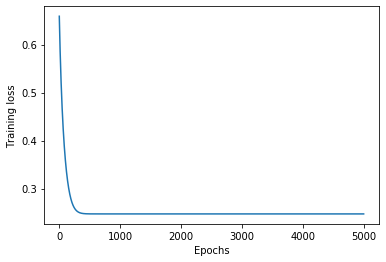

In [7]:
## Plotting the loss
ax = np.arange(len(loss))
plt.plot(ax,loss)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

In [8]:
# Normalization of test set
x_test = np.empty(x_test1.shape)
for i in range(0,x_test1.shape[1]):
    x_test[:,i] = x_test1[:,i] - m[i]*np.ones(x_test1[:,i].shape)
    x_test[:,i] = x_test[:,i]/v[i]

In [9]:
## Predicting on test set and finding accuracy on test set
print("Predicting on test set")
y_hat = sigmoid(x_test@w)
loss = -np.sum(y_test*np.log(y_hat) + (1-y_test)*np.log(1-y_hat))/y_hat.shape[0]
print("Testing loss =",loss)
for i in range(0,y_hat.shape[0]):
    if(y_hat[i]<0.5):
        y_hat[i] = 0
    else:
        y_hat[i] = 1
tot = 0.0
for i in range(0,y_hat.shape[0]):
    if(y_hat[i]==y_test[i]):
        tot+=1   
print("Testing accuracy =",(tot/y_hat.shape[0])*100,"%")

Predicting on test set
Testing loss = 0.3624075783174392
Testing accuracy = 80.0 %
